# This project will focus on technology stocks. I will visualize different stocks and perform a risk analysis of a certain stock based on it prior data.I will also predict future stock prices using Monte Carlo Methodology

I will answer the following questions:

What was the change in price of the stock over time ?


What was the daily return of the stock on average ?

What was the correlation between different stocks closing prices?


What was the correlation between different stocks' closing prices?

What was the correlation between different stocks' daily returns?

How much value do we put at risk by investing in a particular stock?


How can we attempt to predict future stock behavior ?

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid') #create white background 
%matplotlib inline 

In [3]:
from pandas_datareader import data as wb

In [4]:
from datetime import datetime

In [5]:
from __future__ import division 

In [6]:
tech_list=['AAPL','GOOG','MSFT','AMZN'] #Stock List

In [7]:
end=datetime.now()

In [8]:
start=datetime(end.year-1,end.month,end.day) #Establishing Durination 

In [9]:
for stock in tech_list:
    globals()[stock]=wb.DataReader(stock,'yahoo',start,end) #Creating Global variables from stock list

In [10]:
AAPL.describe() # Description of Apple stock 

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,109.924633,106.938045,108.518998,108.470377,1.366323e+08,108.160825
std,21.598509,20.946124,21.447084,21.240339,5.215456e+07,21.364048
min,61.287498,59.224998,60.084999,60.227501,4.669130e+07,59.764240
25%,92.108126,89.907499,91.076876,91.156872,9.873118e+07,90.700562
50%,117.081249,113.985001,115.625000,115.551250,1.246503e+08,115.180126
75%,125.432499,121.914997,124.122501,124.084999,1.633468e+08,123.975412
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


# What was the change in price of the stock over time ?

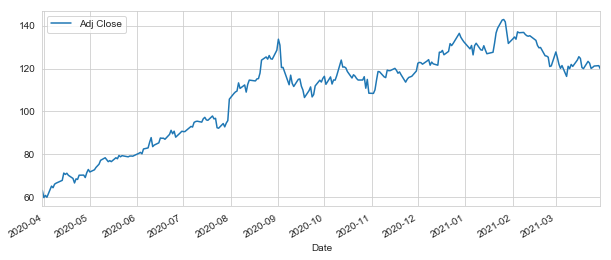

In [11]:
AAPL['Adj Close'].plot(legend=True,figsize = (10,4)) #Displaying Apple Closing prices for a year 

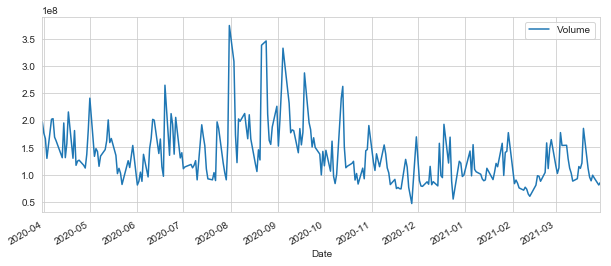

In [12]:
AAPL['Volume'].plot(legend=True,figsize = (10,4)) #Daily volume

In [13]:


ma_day=[10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name]=Series.rolling(AAPL['Adj Close'],ma).mean()

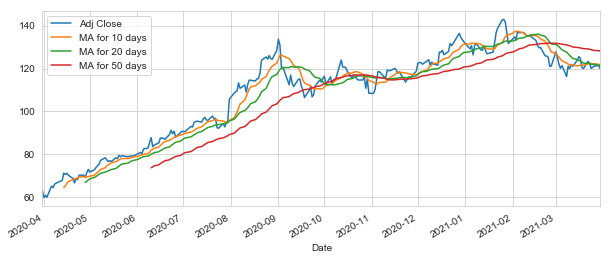

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# What was the daily return of the stock on average ?

In [15]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

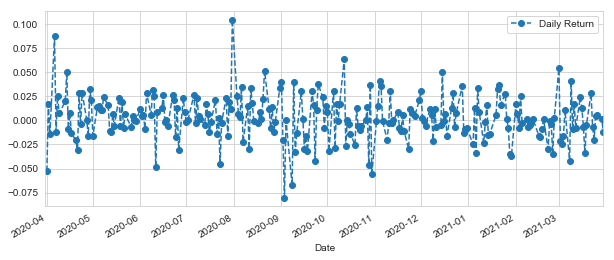

In [16]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True ,linestyle='--',marker='o')

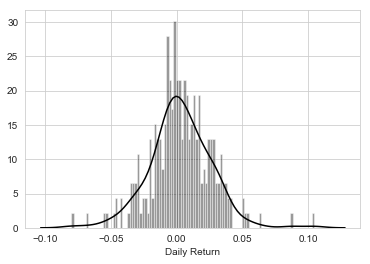

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="black")

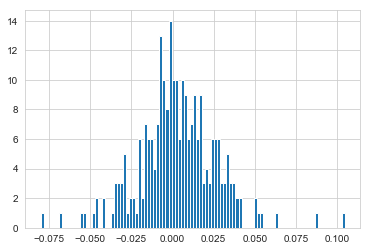

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
closing_df=wb.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
tech_rets=closing_df.pct_change()

# What was the correlation between different stocks closing prices?

In [21]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-03-31,NaN,NaN,NaN,NaN
2020-04-01,-0.052617,-0.021552,-0.049183,-0.035508
2020-04-02,0.016687,0.005834,0.013766,0.020709
2020-04-03,-0.014371,-0.006379,-0.020485,-0.009210
2020-04-06,0.087237,0.047729,0.081102,0.074368


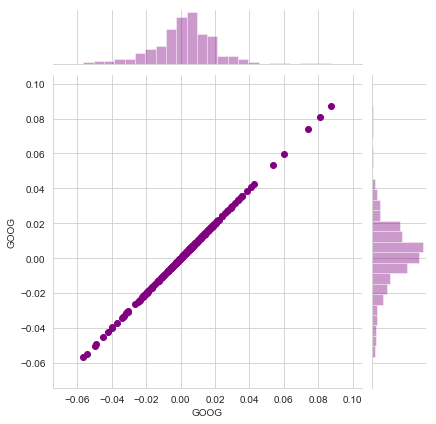

In [22]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='purple') #this has to show a liner relationship because I am comparing 2 of the same stocks

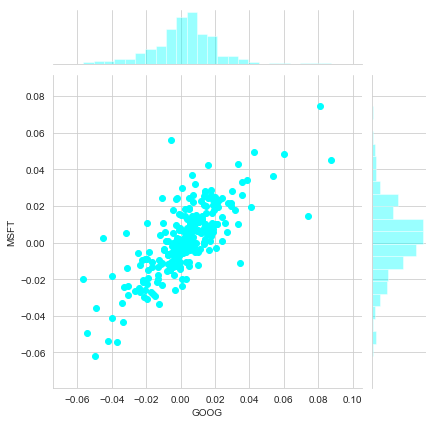

In [23]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='cyan') #Correlation between Google and Microsoft 

# What was the correlation between different stocks' daily returns?

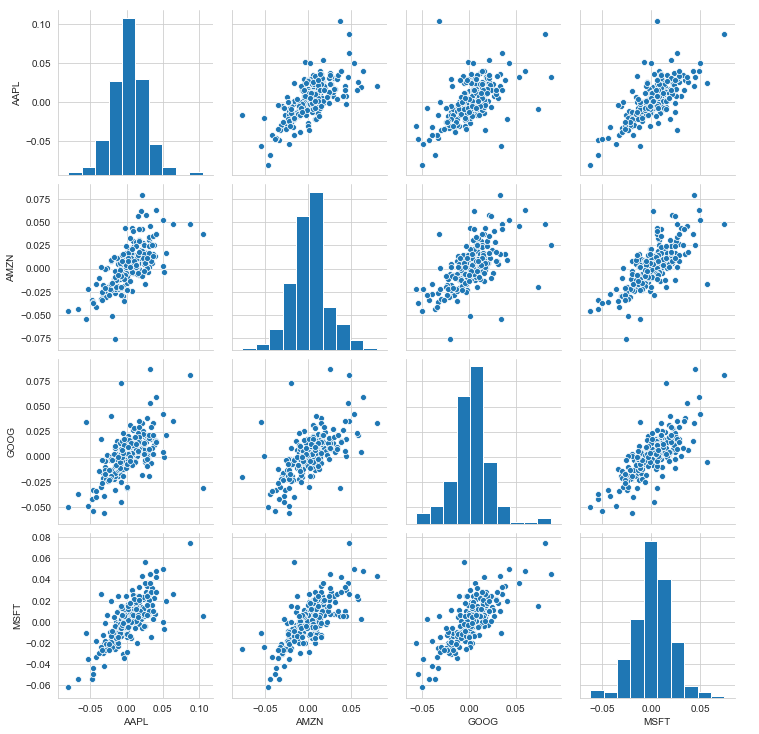

In [24]:
sns.pairplot(tech_rets.dropna())

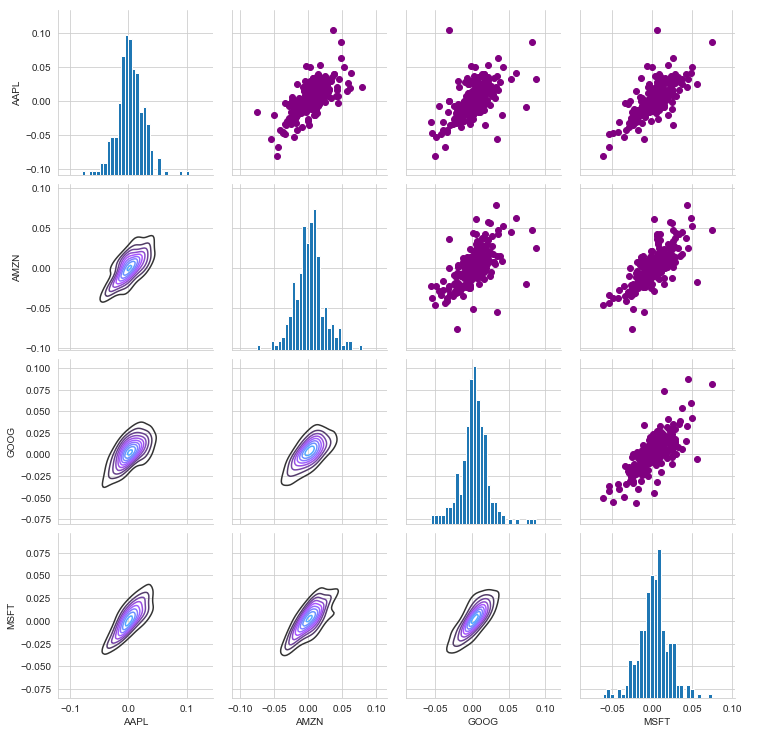

In [29]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

# What was the correlation between different stocks' closing prices?

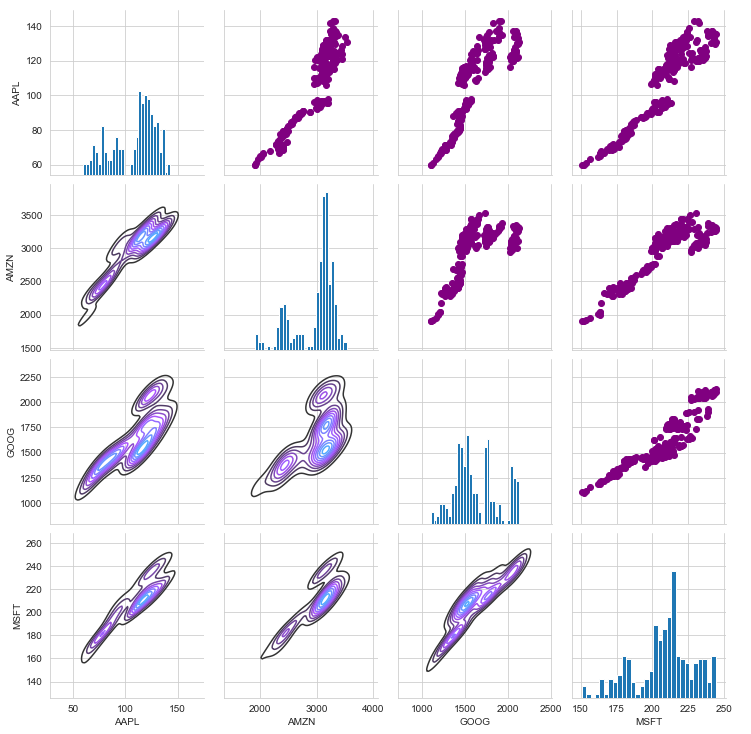

In [31]:
returns_fig=sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

# Correlation Plot

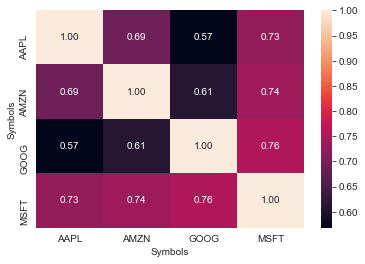

In [35]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

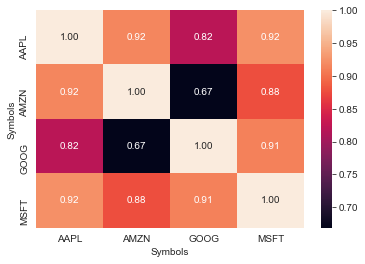

In [37]:
#Correlation of the closing prices

corr= closing_df.dropna().corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


# How much value do we put at risk by investing in a particular stock?

In [38]:
rets=tech_rets.dropna()

In [39]:
area= np.pi*20

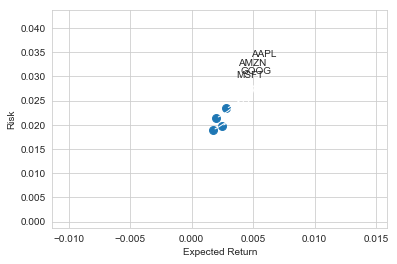

In [42]:
plt.scatter(rets.mean(),rets.std(),s=area  )
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label ,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(50,50),
    textcoords='offset points',ha='right',va='bottom',
    arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

# How can we attempt to predict future stock behavior ?

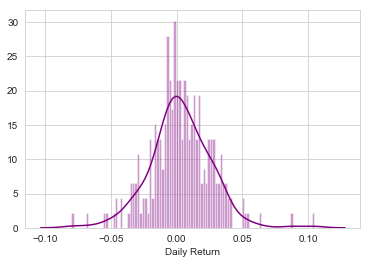

In [43]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [44]:
 rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-04-01,-0.052617,-0.021552,-0.049183,-0.035508
2020-04-02,0.016687,0.005834,0.013766,0.020709
2020-04-03,-0.014371,-0.006379,-0.020485,-0.009210
2020-04-06,0.087237,0.047729,0.081102,0.074368
2020-04-07,-0.011582,0.007013,-0.000345,-0.010770


In [48]:
rets['AAPL'].quantile(0.05)

-0.03378330860507456

In [49]:
days=365
dt=1/days
mu= rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [66]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [51]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-31,1175.310059,1138.140015,1147.300049,1162.810059,2486400,1162.810059
2020-04-01,1129.689941,1097.449951,1122.000000,1105.619995,2344200,1105.619995
2020-04-02,1126.859985,1096.400024,1098.260010,1120.839966,1964900,1120.839966
2020-04-03,1123.540039,1079.810059,1119.015015,1097.880005,2313400,1097.880005
2020-04-06,1194.660034,1130.939941,1138.000000,1186.920044,2664700,1186.920044


Text(0.5,1,'Monte Carlo Analysis for Google')

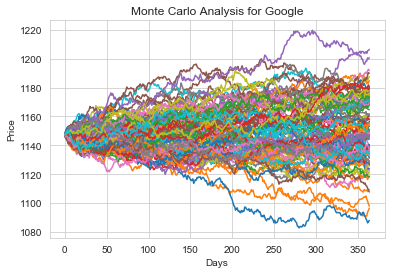

In [69]:
start_price=1147.300049

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [72]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5,1,u'Final price distribution for Google Stock after 365 days')

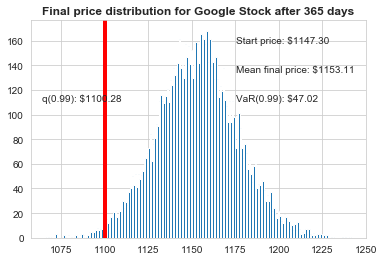

In [73]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')